COMPAS analysis

In [119]:
import pandas as pd
import warnings
import numpy as np
from sklearn.exceptions import DataConversionWarning
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.mode.chained_assignment = None # muting a trivial warning about PANDAS, don't worry about this
df = pd.read_csv('compas-scores-two-years.csv')
df_cleaned = df.loc[(df['days_b_screening_arrest'] <= 30) & (df['days_b_screening_arrest'] >= -30) 
              & (df['is_recid'] != -1) & (df['c_charge_degree'] != "O") & (df['score_text'] != 'N/A')]
df_filtered = df_cleaned[['age','sex', 'race', 'juv_fel_count', 'decile_score', 'priors_count', 'is_recid', 'is_violent_recid', 
                   'v_decile_score']]
df_final = df_filtered.join(pd.get_dummies(df_filtered['race']))
df_final["sex"] = (df_final["sex"] == "Male") + 0 ## Use the binary coding for sex.

print("Black:", np.sum(df_final['African-American'] == 1))
print("Asian:", np.sum(df_final['Asian'] == 1))
print("White:", np.sum(df_final['Caucasian'] == 1))
print("Hispanic:", np.sum(df_final['Caucasian'] == 1))
print("Native American:", np.sum(df_final['Native American'] == 1))
print("Other:", np.sum(df_final['Other'] == 1))

df_final

Black: 3175
Asian: 31
White: 2103
Hispanic: 2103
Native American: 11
Other: 343


,age,sex,race,juv_fel_count,decile_score,priors_count,is_recid,is_violent_recid,v_decile_score,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,69,1,Other,0,1,0,0,0,1,0,0,0,0,0,1
1,34,1,African-American,0,3,0,1,1,1,1,0,0,0,0,0
2,24,1,African-American,0,4,4,1,0,3,1,0,0,0,0,0
5,44,1,Other,0,1,0,0,0,1,0,0,0,0,0,1
6,41,1,Caucasian,0,6,14,1,0,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,23,1,African-American,0,7,0,0,0,5,1,0,0,0,0,0
7210,23,1,African-American,0,3,0,0,0,5,1,0,0,0,0,0
7211,57,1,Other,0,1,0,0,0,1,0,0,0,0,0,1
7212,33,0,African-American,0,2,3,0,0,2,1,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split
races = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']
columns_to_drop = list(['is_recid', 'is_violent_recid', 'race'] + races)
X = df_final.drop(columns=columns_to_drop)
# df_final_copy = df_final.copy()
# X = df_final_copy.drop(columns=races)
# Y = df_final_copy['is_recid']
Y = df_final['is_recid']
print(X)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=137)

      age  sex  juv_fel_count  decile_score  priors_count  v_decile_score
0      69    1              0             1             0               1
1      34    1              0             3             0               1
2      24    1              0             4             4               3
5      44    1              0             1             0               1
6      41    1              0             6            14               2
...   ...  ...            ...           ...           ...             ...
7209   23    1              0             7             0               5
7210   23    1              0             3             0               5
7211   57    1              0             1             0               1
7212   33    0              0             2             3               2
7213   23    0              0             4             2               4

[6172 rows x 6 columns]


In [117]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter = 5000)
logistic_regression.fit(train_x, train_y)

LogisticRegression(max_iter=5000)

In [9]:
from sklearn import metrics
lr_prediction = logistic_regression.predict(test_x)
accuracy = metrics.accuracy_score(test_y, lr_prediction)
percent_accuracy = accuracy * 100
percent_accuracy

68.98785425101215

1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235
1235 1235


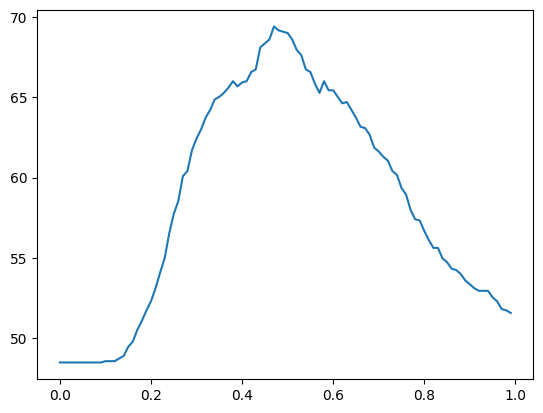

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

thresholds = list()
accuracies = list()
best_threshold = 0
best_accuracy = 0


for i in range(100):
    preds = np.where(logistic_regression.predict_proba(test_x)[:,1] > i /100, 1, 0)
    # preds = np.where(True, logistic_regression.predict_proba(test_x)[:,1] > i / 100 and 1, 0)
    print(preds.size, test_y.size)
    # preds = np.where(logistic_regression.predict_proba(test_x)[:,])
    # accuracy = metrics.accuracy_score(Y, preds)
    accuracy = np.sum(preds == test_y) / len(preds) * 100
    if accuracy > best_accuracy:
        best_threshold = i / 100
        best_accuracy = accuracy
    accuracies.append(np.sum(preds == test_y) / len(preds) * 100)
    # accuracies.append(np.count_nonzero(preds == 0) / len(preds) * 100)
    thresholds.append(i / 100)

    
print(best_threshold, best_accuracy)
plt.plot(thresholds, accuracies)

Binary Race

In [55]:
races = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']

print(df_final)

X = df_final[(df_final['African-American'] == 1) | (df_final['Caucasian'] == 1)]
# print()
# X = df_final.drop(df_final['Asian'] == 1)
# X = X.drop(X['Hispanic'] == 1)
# X = X.drop(X['Native American'] == 1)
# X = X.drop(X['Other'] == 1)
Y = X['is_recid']
X = X.drop(columns=list(['is_recid', 'is_violent_recid', 'race'] + races))

print(X)
print(Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=137)

      age  sex              race  juv_fel_count  decile_score  priors_count  \
0      69    1             Other              0             1             0   
1      34    1  African-American              0             3             0   
2      24    1  African-American              0             4             4   
5      44    1             Other              0             1             0   
6      41    1         Caucasian              0             6            14   
...   ...  ...               ...            ...           ...           ...   
7209   23    1  African-American              0             7             0   
7210   23    1  African-American              0             3             0   
7211   57    1             Other              0             1             0   
7212   33    0  African-American              0             2             3   
7213   23    0          Hispanic              0             4             2   

      is_recid  is_violent_recid  v_decile_score  A

1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056
1056 1056


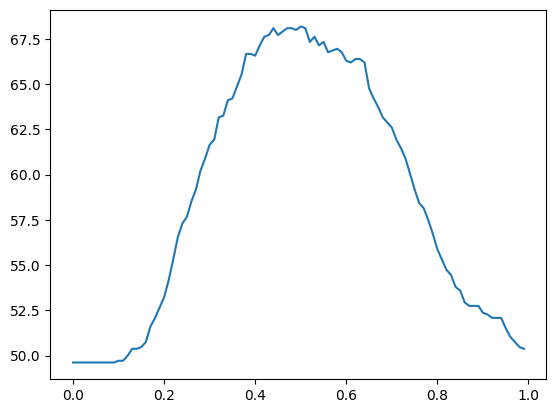

In [53]:
thresholds = list()
accuracies = list()
best_threshold = 0
best_accuracy = 0


for i in range(100):
    preds = np.where(logistic_regression.predict_proba(test_x)[:,1] > i /100, 1, 0)
    # preds = np.where(True, logistic_regression.predict_proba(test_x)[:,1] > i / 100 and 1, 0)
    print(preds.size, test_y.size)
    # preds = np.where(logistic_regression.predict_proba(test_x)[:,])
    # accuracy = metrics.accuracy_score(Y, preds)
    accuracy = np.sum(preds == test_y) / len(preds) * 100
    if accuracy > best_accuracy:
        best_threshold = i / 100
        best_accuracy = accuracy
    accuracies.append(np.sum(preds == test_y) / len(preds) * 100)
    # accuracies.append(np.count_nonzero(preds == 0) / len(preds) * 100)
    thresholds.append(i / 100)

    
print(best_threshold, best_accuracy)
plt.plot(thresholds, accuracies)

Analysis by race

In [136]:
X_aa = df_final[(df_final['African-American'] == 1)]
Y_aa = X_aa['is_recid']
X_aa = X_aa.drop(columns=columns_to_drop)

X_c = df_final[df_final['Caucasian'] == 1]
Y_c = X_c['is_recid']
X_c = X_c.drop(columns=columns_to_drop)

X_na = df_final[df_final['Native American'] == 1]
Y_na = X_na['is_recid']
X_na = X_na.drop(columns=columns_to_drop)

X_h = df_final[df_final['Hispanic'] == 1]
Y_h = X_h['is_recid']
X_h = X_h.drop(columns=columns_to_drop)

X_a = df_final[df_final['Asian'] == 1]
Y_a = X_a['is_recid']
X_a = X_a.drop(columns=columns_to_drop)

X_o = df_final[df_final['Other'] == 1]
Y_o = X_o['is_recid']
X_o = X_o.drop(columns=columns_to_drop)

train_x_aa, test_x_aa, train_y_aa, test_y_aa = train_test_split(X_aa, Y_aa, test_size=0.2, random_state=137)
train_x_c, test_x_c, train_y_c, test_y_c = train_test_split(X_c, Y_c, test_size=0.2, random_state=137)
train_x_a, test_x_a, train_y_a, test_y_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=137)
train_x_h, test_x_h, train_y_h, test_y_h = train_test_split(X_h, Y_h, test_size=0.2, random_state=137)
train_x_o, test_x_o, train_y_o, test_y_o = train_test_split(X_o, Y_o, test_size=0.2, random_state=137)
train_x_na, test_x_na, train_y_na, test_y_na = train_test_split(X_na, Y_na, test_size=0.2, random_state=137)
test_x_all = np.concatenate([test_x_a, test_x_aa, test_x_c, test_x_h, test_x_na, test_x_o])
test_y_all = np.concatenate([test_y_a, test_y_aa, test_y_c, test_y_h, test_y_na, test_y_o])
train_x = np.concatenate((train_x_aa, train_x_c), axis=0)
train_y = np.concatenate((train_y_aa, train_y_c), axis=0)
test_x = np.concatenate((test_x_aa, test_x_c), axis=0)
test_y = np.concatenate((test_y_aa, test_y_c), axis=0)

/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warning

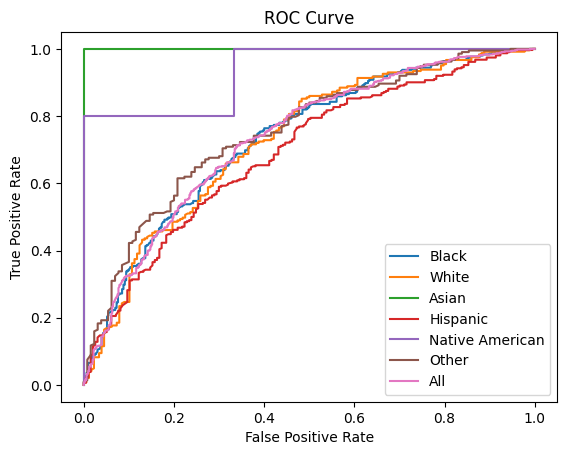

In [118]:
black_tpr_list, black_fpr_list, black_thresholds = metrics.roc_curve(test_y_aa, logistic_regression.predict_proba(test_x_aa)[:,0])
white_tpr_list, white_fpr_list, white_thresholds = metrics.roc_curve(test_y_c, logistic_regression.predict_proba(test_x_c)[:,0])
a_tpr_list, a_fpr_list, a_thresholds = metrics.roc_curve(test_y_a, logistic_regression.predict_proba(test_x_a)[:,0])
h_tpr_list, h_fpr_list, h_thresholds = metrics.roc_curve(Y_h, logistic_regression.predict_proba(X_h)[:,0])
o_tpr_list, o_fpr_list, o_thresholds = metrics.roc_curve(Y_o, logistic_regression.predict_proba(X_o)[:,0])
na_tpr_list, na_fpr_list, na_thresholds = metrics.roc_curve(Y_na, logistic_regression.predict_proba(X_na)[:,0])

all_tpr_list, all_fpr_list, all_thresholds = metrics.roc_curve(test_y, logistic_regression.predict_proba(test_x)[:,0])


plt.plot(black_fpr_list, black_tpr_list, label='Black')
plt.plot(white_fpr_list, white_tpr_list, label='White')
plt.plot(a_fpr_list, a_tpr_list, label='Asian')
plt.plot(h_fpr_list, h_tpr_list, label='Hispanic')
plt.plot(na_fpr_list, na_tpr_list, label='Native American')
plt.plot(o_fpr_list, o_tpr_list, label='Other')
plt.plot(all_fpr_list, all_tpr_list, label='All')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

0.5 68.4659090909091


/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid

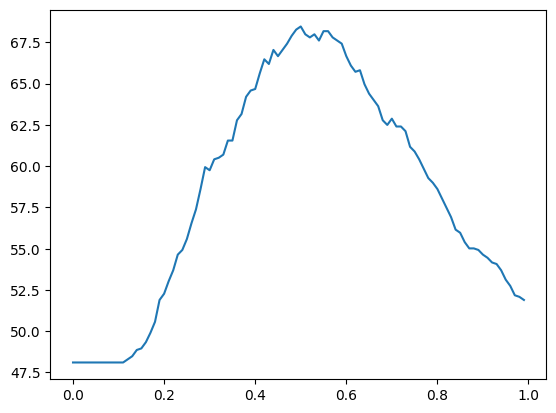

In [95]:
thresholds = list()
accuracies = list()
best_threshold = 0
best_accuracy = 0


for i in range(100):
    preds = np.where(logistic_regression.predict_proba(test_x)[:,1] > i /100, 1, 0)
    accuracy = np.sum(preds == test_y) / len(preds) * 100
    if accuracy > best_accuracy:
        best_threshold = i / 100
        best_accuracy = accuracy
    accuracies.append(np.sum(preds == test_y) / len(preds) * 100)
    thresholds.append(i / 100)

    
print(best_threshold, best_accuracy)
plt.plot(thresholds, accuracies)

In [96]:
def calc_accuracy(logistic_regression, test_x, test_y):
    lr_prediction = logistic_regression.predict(test_x)
    accuracy = metrics.accuracy_score(test_y, lr_prediction)
    return accuracy * 100

print(calc_accuracy(logistic_regression, test_x_aa, test_y_aa))
print(calc_accuracy(logistic_regression, test_x_c, test_y_c))

67.40157480314961
70.07125890736341


ROC Graph for all races trained only on Black and White

In [152]:
def print_tpr_all(model, test_x_trained, test_y_trained):
    pred_y_a = model.predict(test_x_a)
    tpr_a = np.sum((pred_y_a == test_y_a) & (test_y_a == 1)) / np.sum(test_y_a == 1)
    fpr_a = np.sum((pred_y_a != test_y_a) & (test_y_a == 0)) / np.sum(test_y_a == 0)
    ppv_a = np.sum((pred_y_a == test_y_a) & (pred_y_a == 1)) / np.sum(pred_y_a == 1)
    tnr_a = np.sum((pred_y_a == test_y_a) & (test_y_a == 0)) / np.sum(test_y_a == 0)
    fnr_a = np.sum((pred_y_a != test_y_a) & (test_y_a == 1)) / np.sum(test_y_a == 1)
    npv_a = np.sum((pred_y_a == test_y_a) & (pred_y_a == 0)) / np.sum(pred_y_a == 0)
    acc_a = np.sum((pred_y_a == test_y_a)) / len(pred_y_a)

    pred_y_aa = model.predict(test_x_aa)
    tpr_aa = np.sum((pred_y_aa == test_y_aa) & (test_y_aa == 1)) / np.sum(test_y_aa == 1)
    fpr_aa = np.sum((pred_y_aa != test_y_aa) & (test_y_aa == 0)) / np.sum(test_y_aa == 0)
    ppv_aa = np.sum((pred_y_aa == test_y_aa) & (pred_y_aa == 1)) / np.sum(pred_y_aa == 1)
    tnr_aa = np.sum((pred_y_aa == test_y_aa) & (test_y_aa == 0)) / np.sum(test_y_aa == 0)
    fnr_aa = np.sum((pred_y_aa != test_y_aa) & (test_y_aa == 1)) / np.sum(test_y_aa == 1)
    npv_aa = np.sum((pred_y_aa == test_y_aa) & (pred_y_aa == 0)) / np.sum(pred_y_aa == 0)
    acc_aa = np.sum((pred_y_aa == test_y_aa)) / len(pred_y_aa)


    pred_y_h = model.predict(test_x_h)
    tpr_h = np.sum((pred_y_h == test_y_h) & (test_y_h == 1)) / np.sum(test_y_h == 1)
    fpr_h = np.sum((pred_y_h != test_y_h) & (test_y_h == 0)) / np.sum(test_y_h == 0)
    ppv_h = np.sum((pred_y_h == test_y_h) & (pred_y_h == 1)) / np.sum(pred_y_h == 1)
    tnr_h = np.sum((pred_y_h == test_y_h) & (test_y_h == 0)) / np.sum(test_y_h == 0)
    fnr_h = np.sum((pred_y_h != test_y_h) & (test_y_h == 1)) / np.sum(test_y_h == 1)
    npv_h = np.sum((pred_y_h == test_y_h) & (pred_y_h == 0)) / np.sum(pred_y_h == 0)
    acc_h = np.sum((pred_y_h == test_y_h)) / len(pred_y_h)


    pred_y_na = model.predict(test_x_na)
    tpr_na = np.sum((pred_y_na == test_y_na) & (test_y_na == 1)) / np.sum(test_y_na == 1)
    fpr_na = np.sum((pred_y_na != test_y_na) & (test_y_na == 0)) / np.sum(test_y_na == 0)
    ppv_na = np.sum((pred_y_na == test_y_na) & (pred_y_na == 1)) / np.sum(pred_y_na == 1)
    tnr_na = np.sum((pred_y_na == test_y_na) & (test_y_na == 0)) / np.sum(test_y_na == 0)
    fnr_na = np.sum((pred_y_na != test_y_na) & (test_y_na == 1)) / np.sum(test_y_na == 1)
    npv_na = np.sum((pred_y_na == test_y_na) & (pred_y_na == 0)) / np.sum(pred_y_na == 0)
    acc_na = np.sum((pred_y_na == test_y_na)) / len(pred_y_na)


    pred_y_o = model.predict(test_x_o)
    tpr_o = np.sum((pred_y_o == test_y_o) & (test_y_o == 1)) / np.sum(test_y_o == 1)
    fpr_o = np.sum((pred_y_o != test_y_o) & (test_y_o == 0)) / np.sum(test_y_o == 0)
    ppv_o = np.sum((pred_y_o == test_y_o) & (pred_y_o == 1)) / np.sum(pred_y_o == 1)
    tnr_o = np.sum((pred_y_o == test_y_o) & (test_y_o == 0)) / np.sum(test_y_o == 0)
    fnr_o = np.sum((pred_y_o != test_y_o) & (test_y_o == 1)) / np.sum(test_y_o == 1)
    npv_o = np.sum((pred_y_o == test_y_o) & (pred_y_o == 0)) / np.sum(pred_y_o == 0)
    acc_o = np.sum((pred_y_o == test_y_o)) / len(pred_y_o)

    pred_y_c = model.predict(test_x_c)
    tpr_c = np.sum((pred_y_c == test_y_c) & (test_y_c == 1)) / np.sum(test_y_c == 1)
    fpr_c = np.sum((pred_y_c != test_y_c) & (test_y_c == 0)) / np.sum(test_y_c == 0)
    ppv_c = np.sum((pred_y_c == test_y_c) & (pred_y_c == 1)) / np.sum(pred_y_c == 1)
    tnr_c = np.sum((pred_y_c == test_y_c) & (test_y_c == 0)) / np.sum(test_y_c == 0)
    fnr_c = np.sum((pred_y_c != test_y_c) & (test_y_c == 1)) / np.sum(test_y_c == 1)
    npv_c = np.sum((pred_y_c == test_y_c) & (pred_y_c == 0)) / np.sum(pred_y_c == 0)
    acc_c = np.sum((pred_y_c == test_y_c)) / len(pred_y_c)
    
    pred_y_all = model.predict(test_x_all)
    tpr_all = np.sum((pred_y_all == test_y_all) & (test_y_all == 1)) / np.sum(test_y_all == 1)
    fpr_all = np.sum((pred_y_all != test_y_all) & (test_y_all == 0)) / np.sum(test_y_all == 0)
    ppv_all = np.sum((pred_y_all == test_y_all) & (pred_y_all == 1)) / np.sum(pred_y_all == 1)
    tnr_all = np.sum((pred_y_all == test_y_all) & (test_y_all == 0)) / np.sum(test_y_all == 0)
    fnr_all = np.sum((pred_y_all != test_y_all) & (test_y_all == 1)) / np.sum(test_y_all == 1)
    npv_all = np.sum((pred_y_all == test_y_all) & (pred_y_all == 0)) / np.sum(pred_y_all == 0)
    acc_all = np.sum((pred_y_all == test_y_all)) / len(pred_y_all)


    pred_y_trained = model.predict(test_x_trained)
    tpr_trained = np.sum((pred_y_trained == test_y_trained) & (test_y_trained == 1)) / np.sum(test_y_trained == 1)
    fpr_trained = np.sum((pred_y_trained != test_y_trained) & (test_y_trained == 0)) / np.sum(test_y_trained == 0)
    ppv_trained = np.sum((pred_y_trained == test_y_trained) & (pred_y_trained == 1)) / np.sum(pred_y_trained == 1)
    tnr_trained = np.sum((pred_y_trained == test_y_trained) & (test_y_trained == 0)) / np.sum(test_y_trained == 0)
    fnr_trained = np.sum((pred_y_trained != test_y_trained) & (test_y_trained == 1)) / np.sum(test_y_trained == 1)
    npv_trained = np.sum((pred_y_trained == test_y_trained) & (pred_y_trained == 0)) / np.sum(pred_y_trained == 0)
    acc_trained = np.sum((pred_y_trained == test_y_trained)) / len(pred_y_trained)

    print(f"TPR & {tpr_a} & {tpr_aa} & {tpr_h} & {tpr_na} & {tpr_o} & {tpr_c} & {tpr_all} & {tpr_trained} \\\\")
    print(f"FPR & {fpr_a} & {fpr_aa} & {fpr_h} & {fpr_na} & {fpr_o} & {fpr_c} & {fpr_all} & {fpr_trained} \\\\")
    print(f"PPV & {ppv_a} & {ppv_aa} & {ppv_h} & {ppv_na} & {ppv_o} & {ppv_c} & {ppv_all} & {ppv_trained} \\\\")
    print(f"TNR & {tnr_a} & {tnr_aa} & {tnr_h} & {tnr_na} & {tnr_o} & {tnr_c} & {tnr_all} & {tnr_trained} \\\\")
    print(f"FNR & {fnr_a} & {fnr_aa} & {fnr_h} & {fnr_na} & {fnr_o} & {fnr_c} & {fnr_all} & {fnr_trained} \\\\")
    print(f"NPV & {npv_a} & {npv_aa} & {npv_h} & {npv_na} & {npv_o} & {npv_c} & {npv_all} & {npv_trained} \\\\")
    print(f"Acc & {acc_a} & {acc_aa} & {acc_h} & {acc_na} & {acc_o} & {acc_c} & {acc_all} & {acc_trained} \\\\")


    
logistic_regression = LogisticRegression(max_iter = 5000)
logistic_regression.fit(train_x, train_y)

test_x_groups_trained = np.concatenate([test_x_aa, test_x_c])
test_y_groups_trained = np.concatenate([test_y_aa, test_y_c])
print_tpr_all(logistic_regression, test_x_groups_trained, test_y_groups_trained)


np_random = np.random.choice(len(train_x_aa), size=len(train_x_c), replace=False)
train_x_eq = np.concatenate([train_x_aa.iloc[np_random], train_x_c])
train_y_eq = np.concatenate([train_y_aa.iloc[np_random], train_y_c])
logistic_regression.fit(train_x_eq, train_y_eq)

print_tpr_all(logistic_regression, test_x_groups_trained, test_y_groups_trained)




TPR & 1.0 & 0.7424242424242424 & 0.4444444444444444 & 1.0 & 0.4642857142857143 & 0.5168539325842697 & 0.6393162393162393 & 0.6633858267716536 \\
FPR & 0.0 & 0.4098360655737705 & 0.22807017543859648 & 0.0 & 0.24390243902439024 & 0.15637860082304528 & 0.2852760736196319 & 0.29744525547445255 \\
PPV & 1.0 & 0.6621621621621622 & 0.6060606060606061 & 1.0 & 0.5652173913043478 & 0.7076923076923077 & 0.6678571428571428 & 0.674 \\
TNR & 1.0 & 0.5901639344262295 & 0.7719298245614035 & 1.0 & 0.7560975609756098 & 0.8436213991769548 & 0.7147239263803681 & 0.7025547445255474 \\
FNR & 0.0 & 0.25757575757575757 & 0.5555555555555556 & 0.0 & 0.5357142857142857 & 0.48314606741573035 & 0.3606837606837607 & 0.33661417322834647 \\
NPV & 1.0 & 0.6792452830188679 & 0.6376811594202898 & 1.0 & 0.6739130434782609 & 0.7044673539518901 & 0.6883308714918759 & 0.6924460431654677
Acc & 1.0 & 0.6692913385826772 & 0.6274509803921569 & 1.0 & 0.6376811594202898 & 0.7054631828978623 & 0.6790622473726758 & 0.68371212121212

/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warning

In [150]:
np_random = np.random.choice(len(train_x_aa), size=len(train_x_c), replace=False)
print(train_x_aa.iloc[np_random])
print(train_y_aa.iloc[np_random])

      age  sex  juv_fel_count  decile_score  priors_count  v_decile_score
3493   34    1              0             7            27               3
4323   59    1              0             1             0               1
5023   25    1              0             8             8               7
4150   40    1              0             9             5              10
2028   23    0              0             4             0               4
...   ...  ...            ...           ...           ...             ...
196    23    1              0             3             0               4
6410   39    1              0             2             2               1
278    22    1              0            10             3               7
2520   62    1              0             3             3               1
3794   36    0              0             3             1               2

[1682 rows x 6 columns]
3493    0
4323    0
5023    1
4150    1
2028    0
       ..
196     1
6410    0
278    

ROC Curve 